[-3.10190984e+08] 955761.6655413164 [-0.028759]
[0.9904569313468892, 0.9906619809606316, 0.9908588662999631, 0.9910476127996685, 0.9912282550183062, 0.9914008364134157, 0.9915654091086029, 0.9917220336531268, 0.9918707787746043, 0.9920117211254464, 0.992144945023632, 0.992270542188415, 0.9923886114715547, 0.9924992585846435, 0.9926025958230994, 0.9926987417873706, 0.9927878211018927, 0.9928699641323172, 0.9929453067015185, 0.9930139898048667, 0.9930761593252383, 0.993131965748218, 0.9931815638779247, 0.9932251125538787, 0.9932627743693071, 0.9932947153912631, 0.9933211048829166, 0.9933421150283556, 0.993357920660214, 0.9933686989904276, 0.9933746293443926, 0.993375892898791, 0.993372672423321, 0.9933651520265527, 0.9933535169061166, 0.9933379531034052, 0.993318647262959, 0.9932957863966845, 0.9932695576530397, 0.9932401480913029, 0.9932077444610273, 0.9931725329867683, 0.9931346991581537, 0.9930944275253577, 0.9930519015000223, 0.993007303161657, 0.9929608130695403, 0.992912610080129, 

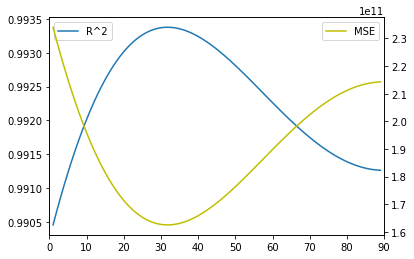

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import linear_model 

# 由实验一得到的已知数据
E = 214.6e9
I_y = 29.9e-6 * 9e-4
A = 81e-6
# import data
df = pd.read_csv('input/data123.csv')
experiments = np.arange(1, 7)
df_exprmnts = [0] * 7
for i in experiments:
    df_exprmnts[i] = df[df['experiment'] == i]

# sgs = [2, 3, 7, 8, 9]
# sg_places = 1e-2 * np.array([[2, -0.05], [0.5, -0.05], [-0.05,0.6],[-0.05,2.6],[-0.05, 4.6]])
sgs = [3, 7, 8, 9]
sg_places = 1e-2 * np.array([[0.5, 0.01], [0,0.6],[0,2.6],[0, 4.6]])

r2s = []
mses = []
for deg in np.arange(1, 90):
    #
    xs = []
    ys = []
    hat_z_dir = np.array([np.cos((90 + deg) * np.pi / 180), np.sin(122.78 * np.pi / 180)])
    hat_y_dir = np.array([np.cos(deg * np.pi / 180), np.sin(32.78 * np.pi / 180)])

    centroid = 1e-2 * np.array([0.89, 1.39])
    hat_zs = [0] * len(sgs)
    for i in range(len(sgs)):
        hat_zs[i] = np.dot(hat_z_dir, sg_places[i] - centroid)

    for expr in [1, 2]:
        nd_dif = np.array(df_exprmnts[expr][['sg' + str(i) for i in sgs]])
        for i in range(4):
            nd_dif[i, :] = nd_dif[i + 1, :] - nd_dif[i, :]
        nd_dif = np.delete(nd_dif, -1, axis = 0)
        for i in range(4):
            # plt.plot(hat_zs, [j * 1e-6 * E - 800. / 81e-6 for j in nd_dif[i, :]])
            xs += [[i] for i in hat_zs]
            ys += [j * 1e-6 * E - 800. / 81e-6 for j in nd_dif[i, :]]

    clf = linear_model.LinearRegression()
    clf.fit(xs, ys)
    r2 = clf.score(xs, ys)
    mse = np.dot(clf.predict(xs) - ys, clf.predict(xs) - ys) / len(xs)
    # for i in range(len(xs)):
    #     mse += (clf.predict(i) - ys) ** 2
    # mse /= len(xs)
    if deg == 32:
        print(clf.coef_, clf.intercept_, (800 / A - clf.intercept_) / clf.coef_)
    r2s += [r2]
    mses += [mse]

print(r2s)
fig = plt.figure() 
ax1 = fig.add_subplot(111)
ax1.plot(np.arange(1, 90), r2s)
ax2 = ax1.twinx()
ax2.plot(np.arange(1, 90), mses, 'y')
ax2.set_xlim([0, 90])
ax1.legend(['R^2'], loc = 2)
ax2.legend(['MSE'], loc = 1)
plt.show()

